## Import Libraries 

In [143]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set_theme()



## Take a look over the data

In [144]:
raw_data_for_stem_precentage = pd.read_csv("data-GYfnm.csv")
raw_data_for_GGI_index = pd.read_csv("BIGI - Sheet1.csv")

In [145]:
clean_BIGI = raw_data_for_GGI_index[["country", "BIGI"]]
clean_BIGI.head(5)

,country,BIGI
0,Bahrain,-0.00794
1,Great Britain,-0.01455
2,Netherlands,-0.01585
3,Iceland,-0.01768
4,New Zealand,-0.01709


In [146]:
raw_data_for_stem_precentage.head(5)

,Country,STEM occupations (thousands),STEM occupations (% of employment),Female share of STEM occupations,STEM tertiary graduates (thousands),STEM tertiary graduates (% of tiertary graduates),Female share of STEM tertiary graduates
0,Austria,725,16.8,35.4,253,30.3,25.9
1,Bangladesh,1101,1.8,25.3,548,11.2,20.6
2,Bolivia,223,4.2,41.9,NaN,NaN,NaN
3,Bosnia and Herzegovina,73,9.1,41.3,39,21.2,44.5
4,Brazil,6723,7.4,47.0,2278,17.7,36.6


In [147]:
clean_stem = raw_data_for_stem_precentage[["Country","Female share of STEM tertiary graduates"]]
clean_stem.dropna(inplace = True)
clean_stem.head(10)

,Country,Female share of STEM tertiary graduates
0,Austria,25.9
1,Bangladesh,20.6
3,Bosnia and Herzegovina,44.5
4,Brazil,36.6
5,Brunei Darussalam,54.3
6,Cambodia,16.7
9,Czechia,35.6
10,Dominican Republic,40
11,Ecuador,29.2
12,Egypt,36.9


In [148]:
clean_BIGI

,country,BIGI
0,Bahrain,-0.00794
1,Great Britain,-0.01455
2,Netherlands,-0.01585
3,Iceland,-0.01768
4,New Zealand,-0.01709
5,Serbia,-0.01670
6,Norway,-0.01950
7,Ireland,-0.01744
8,Ecuador,-0.02012
9,Lebanon,-0.01697


In [149]:
clean_BIGI.rename(columns={'country':'Country'}, inplace=True)

In [150]:
complete_clean_dataset = pd.merge(clean_BIGI, clean_stem, on='Country')
complete_clean_dataset = complete_clean_dataset.drop([25])


In [151]:
#remove row 25 with missing values
complete_clean_dataset["Female share of STEM tertiary graduates"] = pd.to_numeric(complete_clean_dataset["Female share of STEM tertiary graduates"])

In [152]:
Y = np.asarray(complete_clean_dataset["BIGI"]).reshape(-1,1)
X = np.asarray(complete_clean_dataset["Female share of STEM tertiary graduates"]).reshape(-1,1)
reg = LinearRegression().fit(X, Y)
y_predict = reg.predict(X)

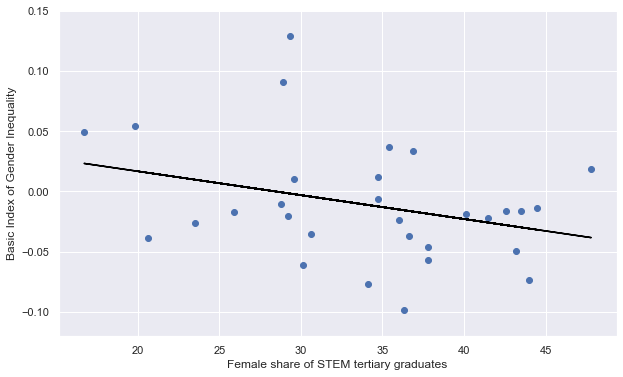

Coefficient of determination: -19.30


<Figure size 432x288 with 0 Axes>

In [154]:
plt.figure(figsize=(10,6))

plt.scatter(X,Y)
plt.plot(X,y_predict, color='black')
plt.ylabel("Basic Index of Gender Inequality")
plt.xlabel("Female share of STEM tertiary graduates")
plt.show()
print('Coefficient of determination: %.2f'
      % r2_score(X, y_predict))
plt.savefig("figure1.png")


In [132]:
X = np.asarray(complete_clean_dataset["BIGI"]).reshape(-1,1)
Y = np.asarray(complete_clean_dataset["Female share of STEM tertiary graduates"]).reshape(-1,1)
reg = LinearRegression().fit(X, Y)
y_predict = reg.predict(X)

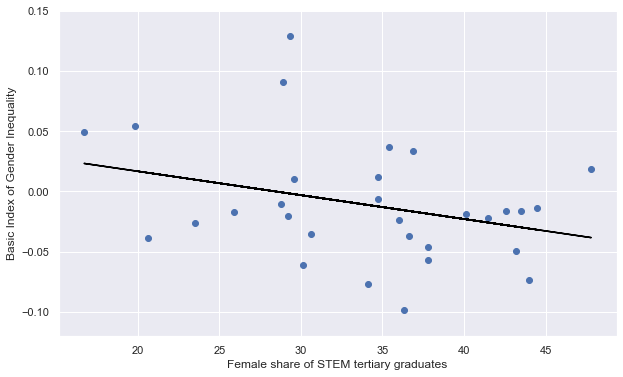

Coefficient of determination: -19.30


<Figure size 432x288 with 0 Axes>

In [155]:
plt.figure(figsize=(10,6))

plt.scatter(X,Y)
plt.plot(X,y_predict, color='black')
plt.ylabel("Basic Index of Gender Inequality")
plt.xlabel("Female share of STEM tertiary graduates")
plt.show()
print('Coefficient of determination: %.2f'
      % r2_score(X, y_predict))
plt.savefig("figure2.png")
